<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/SitiMilda_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##ML-2 Supervised Learning - Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

##Load Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


##Analisis Korelasi

In [3]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


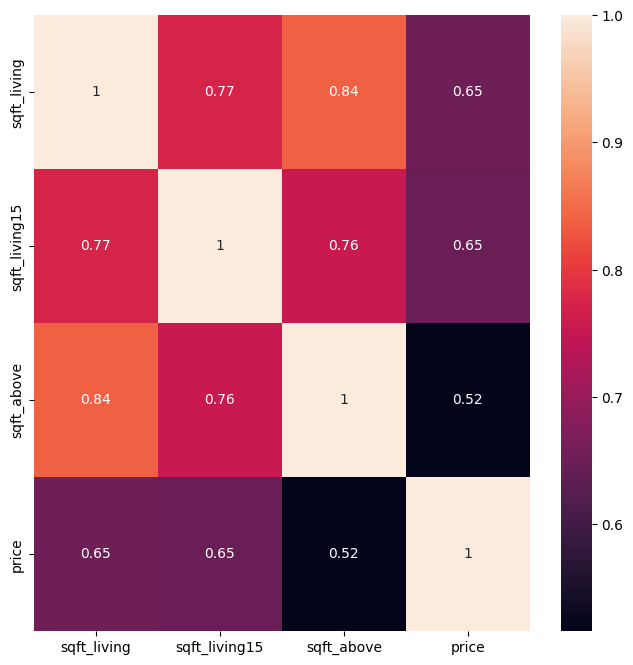

In [4]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

##Split Dataset

In [5]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
print("ukuran training dan testing data:")
print("training dataset :", x_train.shape, y_train.shape)
print("testing dataset :", x_test.shape, y_test.shape)

ukuran training dan testing data:
training dataset : (80, 3) (80,)
testing dataset : (20, 3) (20,)


##Modeling

In [7]:
LinearReg = LinearRegression().fit(x_train, y_train)
LassoReg = Lasso(alpha=0.1).fit(x_train, y_train)
RidgeReg = Ridge(alpha=0.1).fit(x_train, y_train)
SVRReg = SVR().fit(x_train, y_train)
DTReg = DecisionTreeRegressor(random_state=47).fit(x_train, y_train)

##Evaluasi Model Menggunakan Metric MSE dan R2

In [8]:
ypredtrain_reglin = LinearReg.predict(x_train)
ypredtest_reglin = LinearReg.predict(x_test)

ypredtrain_lasso = LassoReg.predict(x_train)
ypredtest_lasso = LassoReg.predict(x_test)

ypredtrain_ridge = RidgeReg.predict(x_train)
ypredtest_ridge = RidgeReg.predict(x_test)

ypredtrain_svr = SVRReg.predict(x_train)
ypredtest_svr = SVRReg.predict(x_test)

ypredtrain_dt = DTReg.predict(x_train)
ypredtest_dt = DTReg.predict(x_test)


In [9]:
print('Nilai MSE data training Regresi Linier =', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier =', mean_squared_error(y_test, ypredtest_reglin),'\n')

print('Nilai MSE data training Regresi Lasso =', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso =', mean_squared_error(y_test, ypredtest_lasso),'\n')

print('Nilai MSE data training Regresi Ridge =', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge =', mean_squared_error(y_test, ypredtest_ridge),'\n')

print('Nilai MSE data training Regresi SVR =', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing Regresi SVR =', mean_squared_error(y_test, ypredtest_svr),'\n')

print('Nilai MSE data training Regresi Decision Tree =', mean_squared_error(y_train, ypredtrain_dt))
print('Nilai MSE data testing Regresi Decision Tree =', mean_squared_error(y_test, ypredtest_dt),'\n')

Nilai MSE data training Regresi Linier = 51040616225.03679
Nilai MSE data testing Regresi Linier = 32881775262.15838 

Nilai MSE data training Regresi Lasso = 51040616225.03679
Nilai MSE data testing Regresi Lasso = 32881775271.07427 

Nilai MSE data training Regresi Ridge = 51040616225.0368
Nilai MSE data testing Regresi Ridge = 32881775254.902454 

Nilai MSE data training Regresi SVR = 113673471256.08711
Nilai MSE data testing Regresi SVR = 37393496977.231895 

Nilai MSE data training Regresi Decision Tree = 455625000.0
Nilai MSE data testing Regresi Decision Tree = 40958648000.0 



In [10]:
print(f'R^2 score Regresi Linier : {LinearReg.score(X,Y)}')
print(f'R^2 score Regresi Lasso : {LassoReg.score(X,Y)}')
print(f'R^2 score Regresi Ridge : {RidgeReg.score(X,Y)}')
print(f'R^2 score Regresi SVR : {SVRReg.score(X,Y)}')
print(f'R^2 score Regresi Decision Tree : {DTReg.score(X,Y)}')

R^2 score Regresi Linier : 0.48353037146199596
R^2 score Regresi Lasso : 0.48353037144257016
R^2 score Regresi Ridge : 0.4835303714778053
R^2 score Regresi SVR : -0.07215508470730314
R^2 score Regresi Decision Tree : 0.906788861012355


##Visualisasi Hasil Prediksi dengan Data Sebenarnya

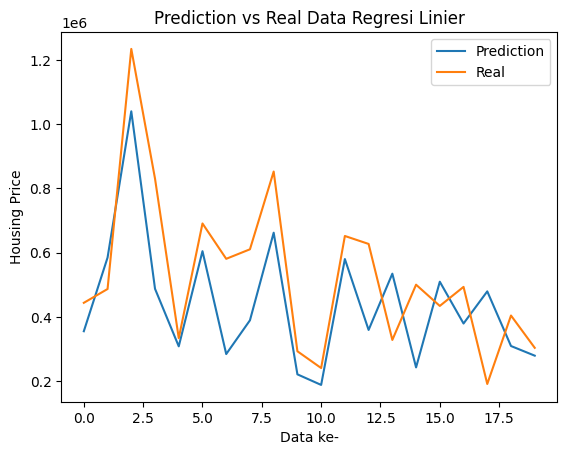

In [11]:
plt.plot(y_test.values)
plt.plot(ypredtest_reglin)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

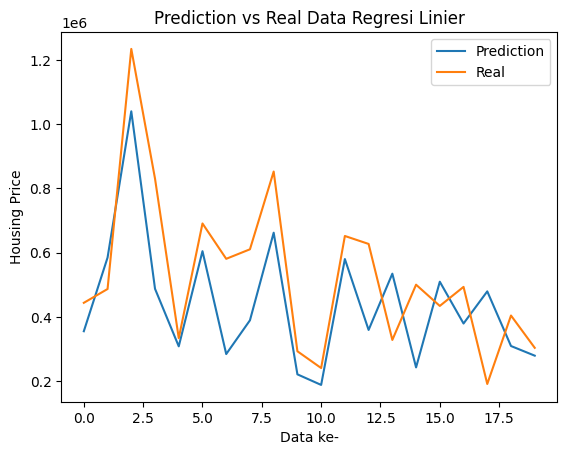

In [12]:
plt.plot(y_test.values)
plt.plot(ypredtest_lasso)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

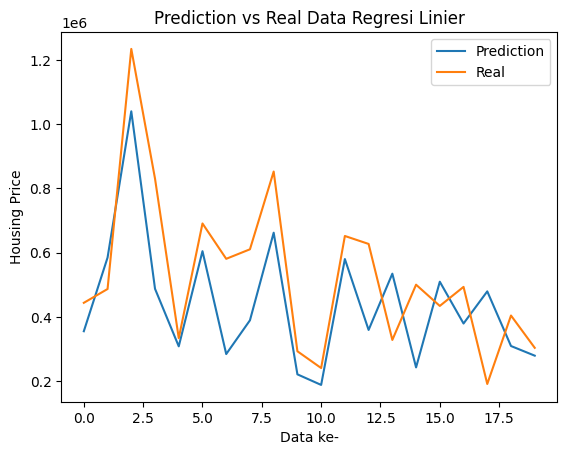

In [13]:
plt.plot(y_test.values)
plt.plot(ypredtest_ridge)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

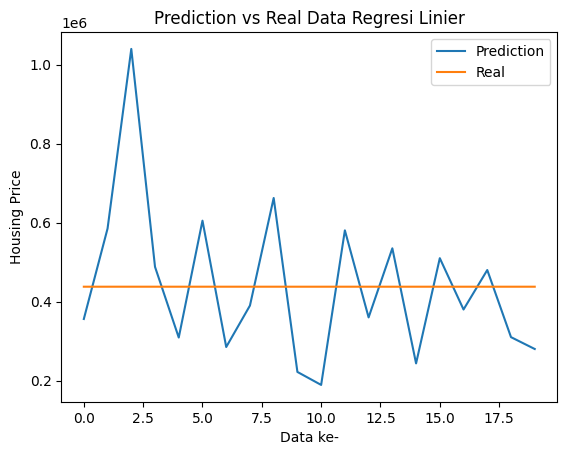

In [14]:
plt.plot(y_test.values)
plt.plot(ypredtest_svr)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

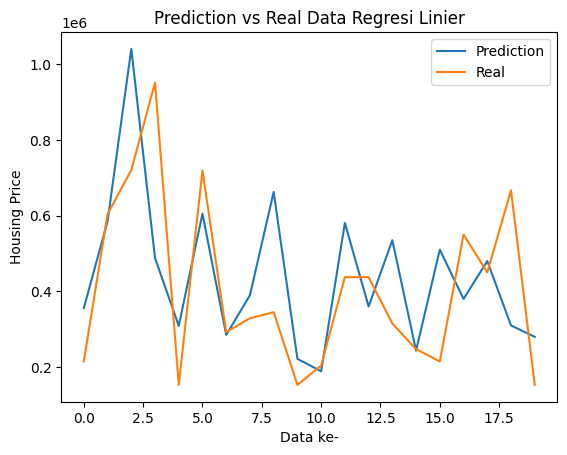

In [15]:
plt.plot(y_test.values)
plt.plot(ypredtest_dt)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data ke-')
plt.ylabel('Housing Price')
plt.legend(labels=['Prediction', 'Real'])
plt.show()

##Kesimpulan

In [ ]:
sqft_living = float(input('Input SQFT Living \t= '))
sqft_living15 = float(input('Input SQFT Living 15 \t= '))
sqft_above = float(input('Input SQFT Above \t= '))
data_baru = [[sqft_living, sqft_living15, sqft_above]]

hasil_prediksi= DTReg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

print('\nPrediksi Housing Price=', hasil_prediksi)